## EDA: Exploratory Data Analysis
- Reason: To Examine a Data before building ML algorithm.
- To get insight from the Data
- To identify different patterns , relations, anamolies in data using some statistical graphs and other visualization techniques.
- Extract important features from Data
- Handling Outliers and Missing Values


In [1]:
# Import required liibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df=pd.read_csv(r'A:\Codebasics\Titanic\Titanic_Data.csv')

In [8]:
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [9]:
# Dimension of Data
df.shape

(1309, 14)

In [13]:
# Get features name of data
df.columns

Index(['pclass', 'survived', 'name', 'gender', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [14]:
df.index

RangeIndex(start=0, stop=1309, step=1)

In [15]:
df.describe()
# Stat summary of all nummerical features

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [20]:
# Get full info about all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int8   
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   gender     1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(3), int8(1), object(7)
memory usage: 134.3+ KB


In [17]:
# understaand data type of features and downgrade its feature to save memory
df['pclass'].unique()

array([1, 2, 3], dtype=int64)

In [18]:
df.survived.unique()

array([1, 0], dtype=int64)

In [19]:
# Convert datatype of feature
df.pclass= df.pclass.astype('int8')

In [21]:
## Check is there any missing values
df.isnull().sum()

pclass          0
survived        0
name            0
gender          0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

<AxesSubplot:>

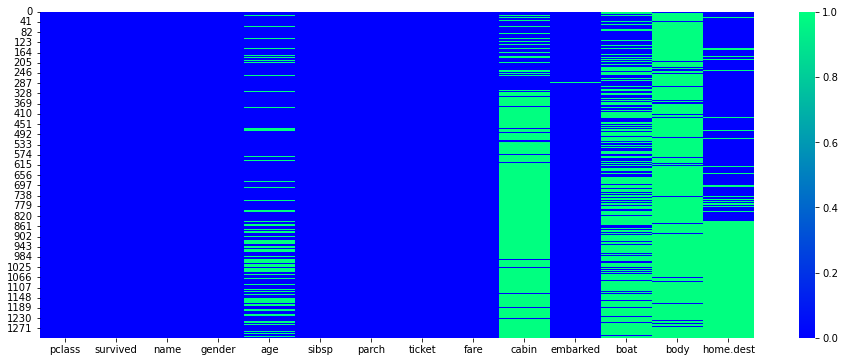

In [23]:
# Visualize all missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cmap="winter")

In [26]:
# Get Unique value for each feature
for k  in df.keys():
    if df[k].unique().size<50:
        print(k,df[k].unique())

pclass [1 2 3]
survived [1 0]
gender ['female' 'male']
sibsp [0 1 2 3 4 5 8]
parch [0 2 1 4 3 5 6 9]
embarked ['S' 'C' nan 'Q']
boat ['2' '11' nan '3' '10' 'D' '4' '9' '6' 'B' '8' 'A' '5' '7' 'C' '14' '5 9'
 '13' '1' '15' '5 7' '8 10' '12' '16' '13 15 B' 'C D' '15 16' '13 15']


## Decide features needs to drop or not
- if more than 10% values are missing then drop them untill they really contributes in EDA
- Some features like Person name, ID, Pin Code, SSN, doesn't add musch valu because they are unique
- There could be 2 features which has same nature

In [28]:
df.head()

,pclass,survived,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [31]:
df.drop(["name","ticket","cabin","body","home.dest"],axis=1,inplace=True)
# inplace = True (Perform in Original Dataset rather making copy of  Data)

In [40]:
df.drop(["boat"],axis=1,inplace=True)
df.head(2)

,pclass,survived,gender,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S


# Fill Missing values
- If Categorical data is there, replace with mode() 
- If Descrete Data and range is very less(ex:0-10) then replace with mode, If range is large then replce with median()
- If Continuous Data then replce with median()

In [33]:
df.pclass = df.pclass.fillna(df.pclass.mode()[0])

In [34]:
df.embarked = df.embarked.fillna(df.embarked.mode()[0])

In [35]:
df.age = df.age.fillna(df.age.mean())

In [36]:
df.isnull().sum()

pclass        0
survived      0
gender        0
age           0
sibsp         0
parch         0
fare          1
embarked      0
boat        823
dtype: int64

<AxesSubplot:>

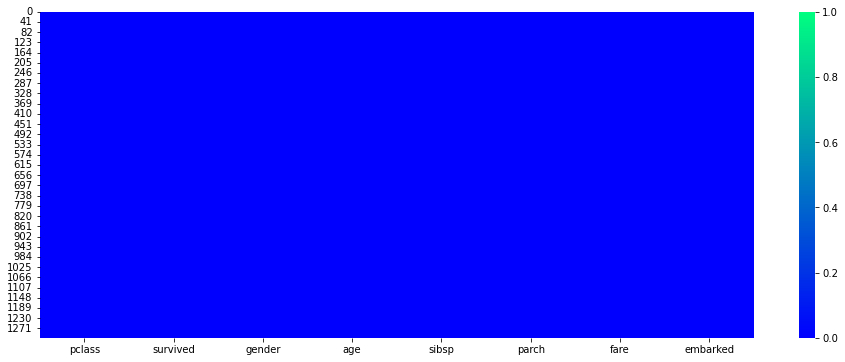

In [41]:
# Find out correlation and perform visualization with heatmap
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cmap='winter')

In [43]:
# Get Correlation between 2 features
corr = df.corr()
corr

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000


<AxesSubplot:>

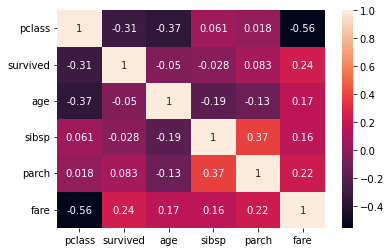

In [45]:
# Visualization for correlation between diff feature
sns.heatmap(corr,annot=True)

In [48]:
# Find out features which needs type casting
df.dtypes

pclass         int8
survived       int8
gender       object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [47]:
df.survived = df.survived.astype("int8")

In [49]:
df.age= df.age.astype('float16')

In [50]:
 df.sibsp = df.sibsp.astype("int8")

In [51]:
df.parch = df.parch.astype("int8")

In [52]:
df.fare = df.fare.astype("float16")

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int8   
 1   survived  1309 non-null   int8   
 2   gender    1309 non-null   object 
 3   age       1309 non-null   float16
 4   sibsp     1309 non-null   int8   
 5   parch     1309 non-null   int8   
 6   fare      1308 non-null   float16
 7   embarked  1309 non-null   object 
dtypes: float16(2), int8(4), object(2)
memory usage: 30.8+ KB


C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

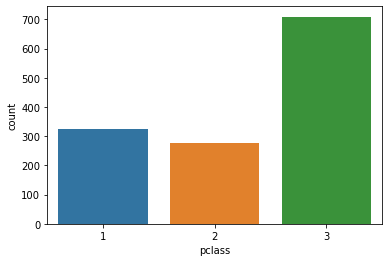

In [55]:
# count of categorical data
sns.countplot(df.pclass)

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

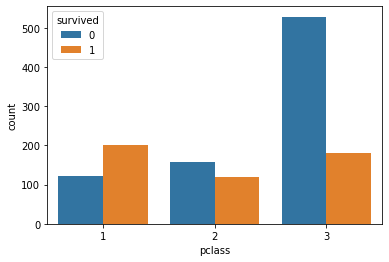

In [56]:
sns.countplot(df.pclass,hue=df.survived)

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pclass', ylabel='count'>

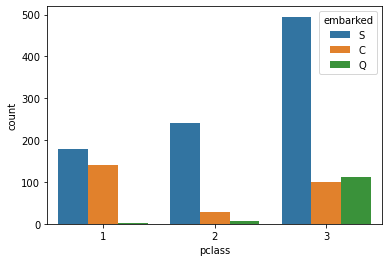

In [57]:
sns.countplot(df.pclass,hue=df.embarked)

<AxesSubplot:xlabel='age', ylabel='Count'>

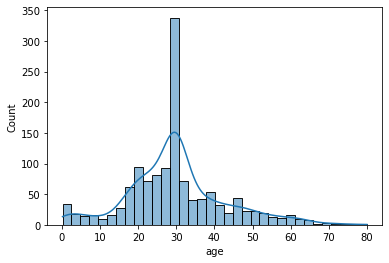

In [61]:
# Histogram of descrete Data to understand central tendency of data
sns.histplot(df.age,kde=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

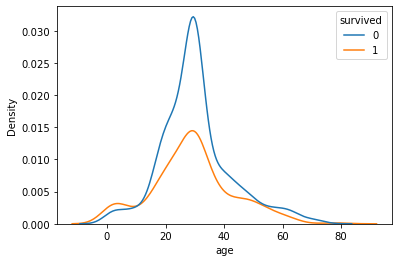

In [63]:
sns.kdeplot(df.age,hue=df.survived)